In [ ]:
import math

 
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

a1 = 0.8
a0 = -5
study_hours = 7
probability_pass = sigmoid(a0 + a1 * study_hours)
print(f"The probability of passing with 7 study hours is: {probability_pass:.4f}")

 
threshold = 0.5
if probability_pass >= threshold:
    prediction = "pass"
else:
    prediction = "fail"
print(f"Predicted class for 7 study hours: {prediction}")


 
def softmax(z):
  exps = [math.exp(i) for i in z]
  sum_of_exps = sum(exps)
  return [j / sum_of_exps for j in exps]

z = [2, 1, 0]
probabilities = softmax(z)

print("\nProbabilities after applying Softmax:")
for i, prob in enumerate(probabilities):
    print(f"Class {i+1}: {prob:.4f}")


The probability of passing with 7 study hours is: 0.6457
Predicted class for 7 study hours: pass

Probabilities after applying Softmax:
Class 1: 0.6652
Class 2: 0.2447
Class 3: 0.0900


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

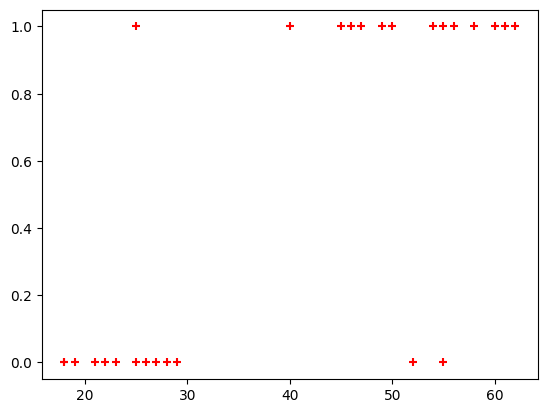

In [ ]:
 
import pandas as pd
from matplotlib import pyplot as plt
 

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

 
model.coef_

 
model.intercept_
 
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

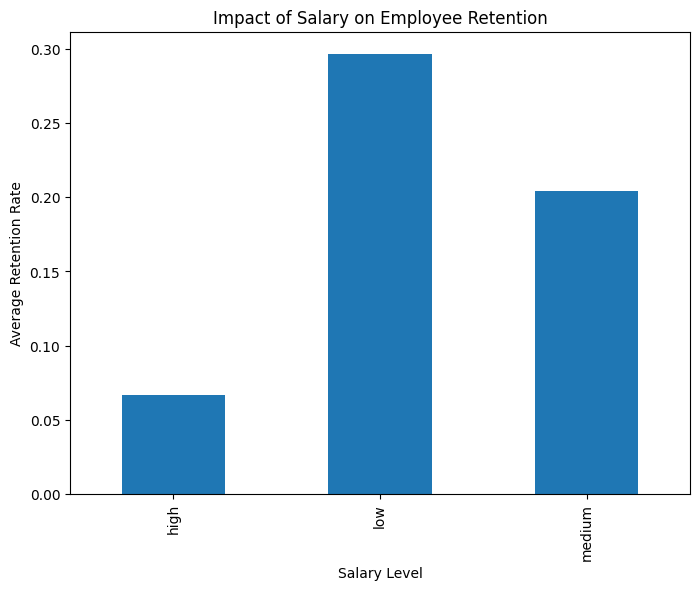

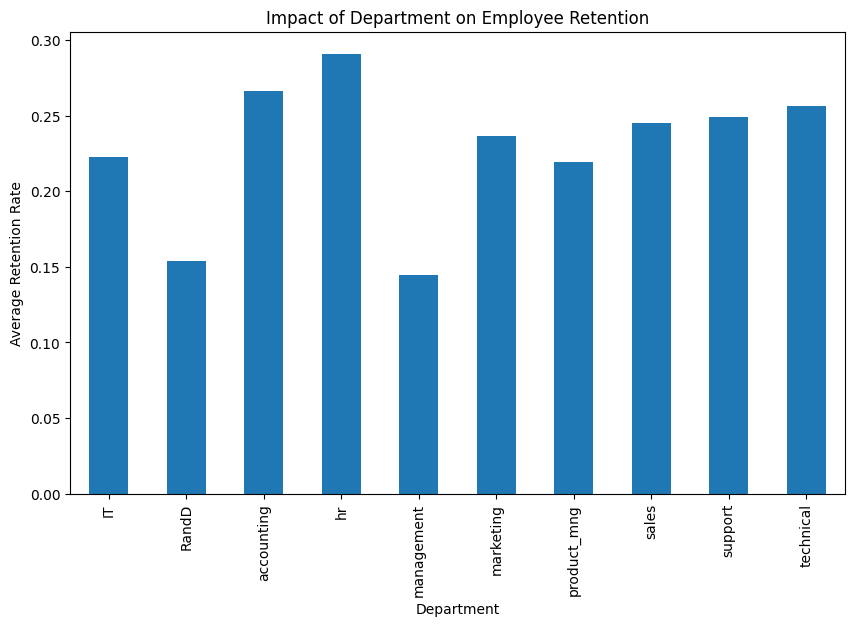

Accuracy of the Logistic Regression model: 0.7813333333333333


In [ ]:
# prompt: in the above code error occurred at salary

import math
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ... (rest of your existing code)

# Load the HR dataset (replace 'your_hr_data.csv' with the actual file path)
try:
    hr_df = pd.read_csv('/content/HR_comma_sep.csv') #It was using the wrong file name
except FileNotFoundError:
    print("Error: 'HR_comma_sep.csv' not found. Please upload the file to your Colab environment or provide the correct path.")
    exit()


# 1. Exploratory Data Analysis

# Explore salary impact on retention
salary_retention = hr_df.groupby('salary')['left'].mean()
plt.figure(figsize=(8, 6))
salary_retention.plot(kind='bar')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Average Retention Rate')
plt.show()

# Explore department impact on retention
dept_retention = hr_df.groupby('Department')['left'].mean()
plt.figure(figsize=(10, 6))
dept_retention.plot(kind='bar')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Average Retention Rate')
plt.show()


# 2. Feature Engineering (if needed)

# Convert categorical variables to numerical using one-hot encoding
hr_df = pd.get_dummies(hr_df, columns=['salary', 'Department'], drop_first=True)

# 3. Logistic Regression Model

# Define features (X) and target (y)
X = hr_df.drop('left', axis=1)  # Features
y = hr_df['left']              # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear') # Use liblinear solver for smaller datasets
model.fit(X_train, y_train)

# 4. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Logistic Regression model: 0.9523809523809523


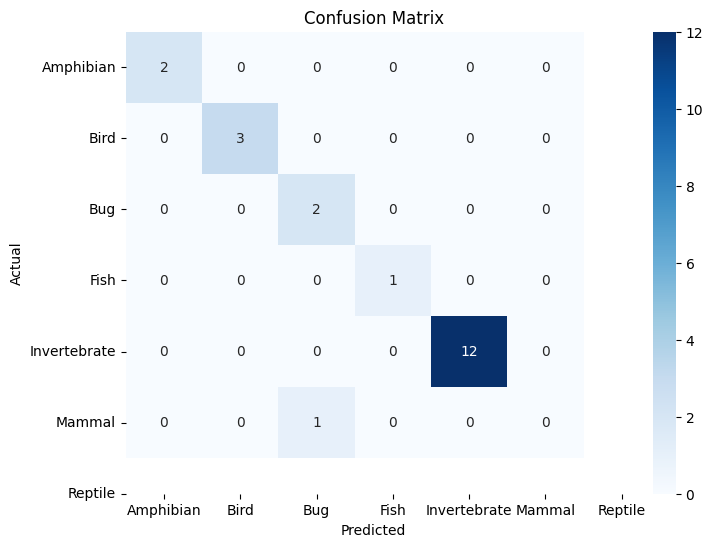

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

zoo_df = pd.read_csv('/content/zoo-data.csv')
class_type_df = pd.read_csv('/content/zoo-class-type.csv')

zoo_df = pd.merge(zoo_df, class_type_df, left_on='class_type', right_on='Class_Number')
zoo_df = zoo_df.drop(columns=['Class_Number', 'Animal_Names'])

X = zoo_df.drop(['animal_name', 'class_type', 'Class_Type'], axis=1)
y = zoo_df['Class_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Iris Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



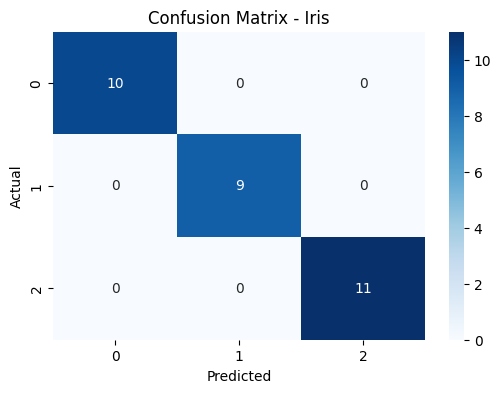

Diabetes Dataset:
Accuracy: 0.6883116883116883
Confusion Matrix:
 [[79 20]
 [28 27]]


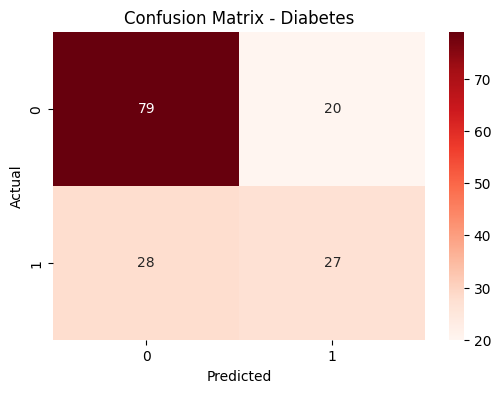

Heart Dataset:
Best k: 6
Accuracy: 0.9344262295081968
Confusion Matrix:
 [[28  1]
 [ 3 29]]


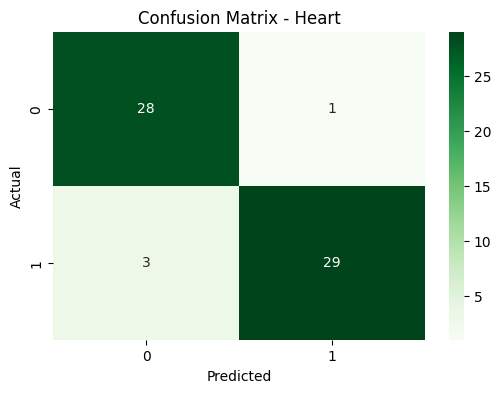

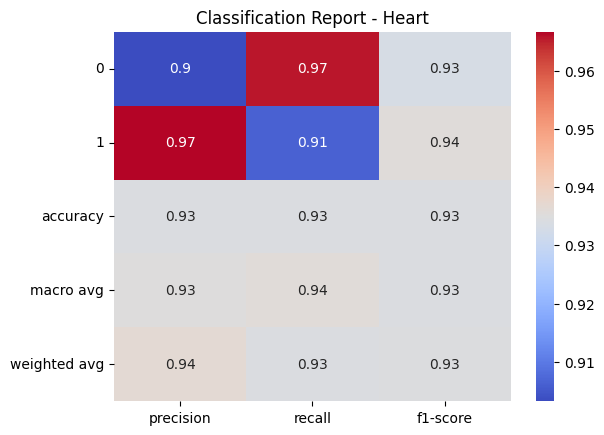

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Datasets
iris_df = pd.read_csv('/content/iris (3).csv')
diabetes_df = pd.read_csv('/content/diabetes (1).csv')

# 1. KNN Classifier for Iris Dataset
X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)
print("Iris Dataset:")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_iris, y_pred_iris), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Iris')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. KNN Classifier for Diabetes Dataset
X_diabetes = diabetes_df.drop('Outcome', axis=1)
y_diabetes = diabetes_df['Outcome']
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)
print("Diabetes Dataset:")
print("Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Confusion Matrix:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_diabetes, y_pred_diabetes), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Diabetes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. KNN Classifier for Heart Dataset
heart_df = pd.read_csv('/content/heart (1).csv')
X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target']
X_heart_scaled = scaler.fit_transform(X_heart)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart_scaled, y_heart, test_size=0.2, random_state=42)
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn_heart = KNeighborsClassifier(n_neighbors=k)
    knn_heart.fit(X_train_heart, y_train_heart)
    y_pred_heart = knn_heart.predict(X_test_heart)
    accuracies.append(accuracy_score(y_test_heart, y_pred_heart))
optimal_k = k_values[np.argmax(accuracies)]
knn_heart = KNeighborsClassifier(n_neighbors=optimal_k)
knn_heart.fit(X_train_heart, y_train_heart)
y_pred_heart = knn_heart.predict(X_test_heart)
print("Heart Dataset:")
print("Best k:", optimal_k)
print("Accuracy:", accuracy_score(y_test_heart, y_pred_heart))
print("Confusion Matrix:\n", confusion_matrix(y_test_heart, y_pred_heart))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_heart, y_pred_heart), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Heart')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()# Plot Classification Report for Heart Dataset
report = classification_report(y_test_heart, y_pred_heart, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report - Heart')
plt.show()